## H&M Personalized Fashion Recommendations
In this competition, H&M Group invited us to develop product recommendations based on data from previous transactions, as well as from customer and product meta data. The available meta data spans from simple data, such as garment type and customer age, to text data from product descriptions, to image data from garment images.

## My approach
Here with this given data I am going to approach EDA concept. Before proceeding let me tell you... what is EDA?

Exploratory Data Analysis: this is unavoidable and one of the major step to fine-tune the given data set(s) in a different form of analysis to understand the insights of the key characteristics of various entities of the data set like column(s), row(s) by applying Pandas, NumPy, Statistical Methods, and Data visualization packages. 

In [1]:
#Importing all the required liabraries
import pandas as pd
import numpy as np
import os

import sys, warnings, time, os, copy, gc, re, random, pickle
warnings.filterwarnings('ignore')
from IPython.display import display


import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import matplotlib.image as mpimg
sns.set()
from pandas.io.json import json_normalize
from pprint import pprint
from pathlib import Path
from tqdm import tqdm
tqdm.pandas()
from collections import Counter
from datetime import datetime, timedelta

## Importing all the required dataset and analyze the dataset

**Articles Dataset**

In [2]:
#Importing articles dataset
articles = pd.read_csv("../input/h-and-m-personalized-fashion-recommendations/articles.csv")
articles.head()

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
3,110065001,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,9,Black,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
4,110065002,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,10,White,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."


In [3]:
#Analyzing the columns and the data types
print(articles.info(), articles.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105542 entries, 0 to 105541
Data columns (total 25 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   article_id                    105542 non-null  int64 
 1   product_code                  105542 non-null  int64 
 2   prod_name                     105542 non-null  object
 3   product_type_no               105542 non-null  int64 
 4   product_type_name             105542 non-null  object
 5   product_group_name            105542 non-null  object
 6   graphical_appearance_no       105542 non-null  int64 
 7   graphical_appearance_name     105542 non-null  object
 8   colour_group_code             105542 non-null  int64 
 9   colour_group_name             105542 non-null  object
 10  perceived_colour_value_id     105542 non-null  int64 
 11  perceived_colour_value_name   105542 non-null  object
 12  perceived_colour_master_id    105542 non-null  int64 
 13 

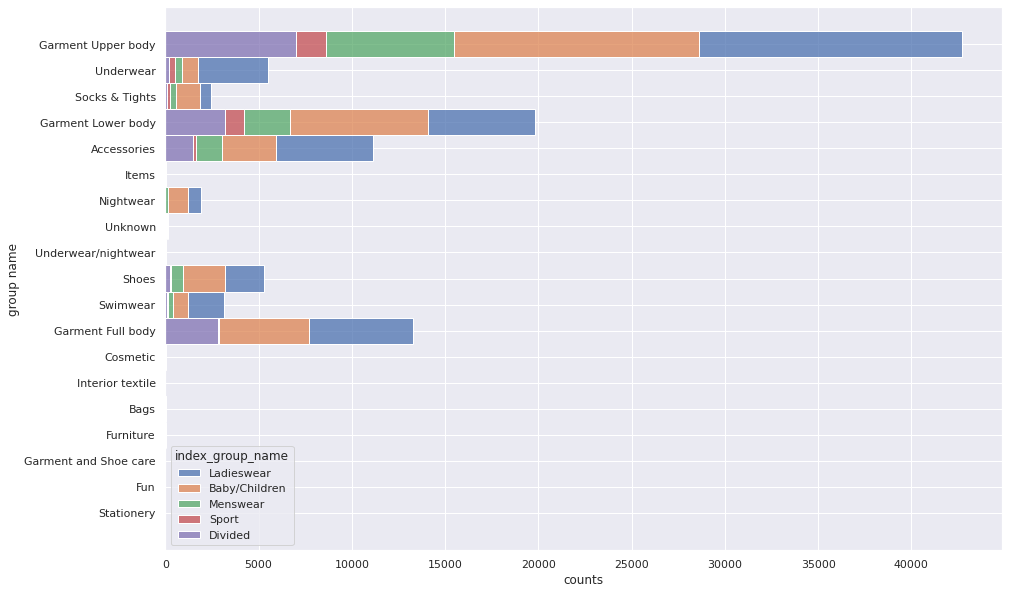

In [4]:
#Analyze the grament sections with the product group name and index group name
plt.subplots(figsize=(15,10))
ax=sns.histplot(data=articles, y='product_group_name',hue='index_group_name', multiple="stack")
ax.set_xlabel('counts')
ax.set_ylabel('group name')
plt.show()

From above we can see that the purchase of 'Garment upper body', 'Garment lower body' and 'Garment full body' is heigher.

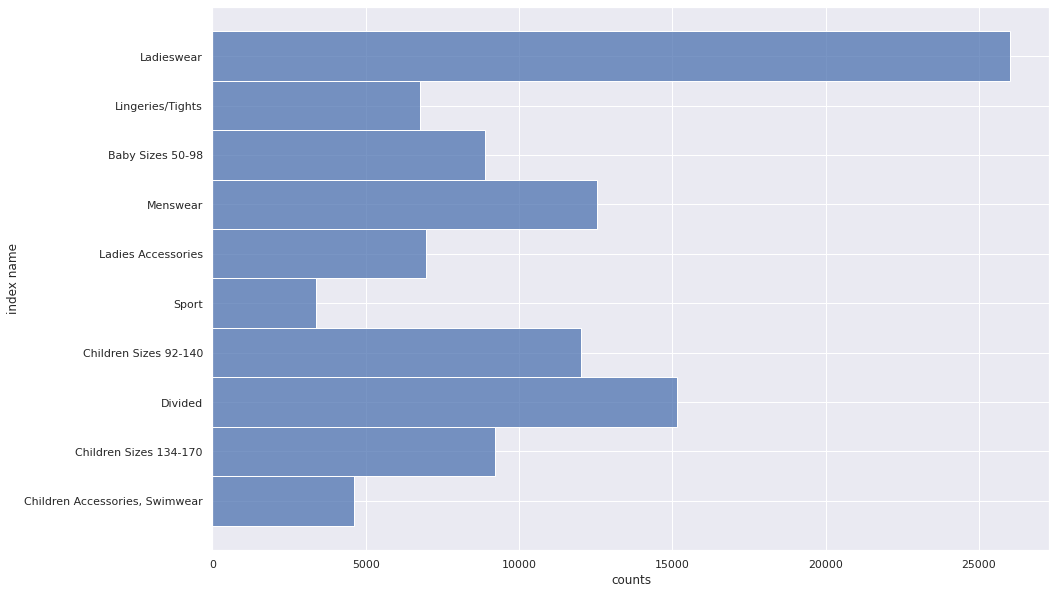

In [5]:
#Analyze the grament sections with the product group
plt.subplots(figsize=(15,10))
ax=sns.histplot(data=articles, y='index_name')
ax.set_xlabel('counts')
ax.set_ylabel('index name')
plt.show()

From above we can see that 'Ladieswear' selling is leading in this 'Index Name' section. But also thhere are some sub-groups for index group. Lets analyze that also.

In [6]:
articles.groupby(['index_group_name', 'index_name']).count()['article_id']

index_group_name  index_name                    
Baby/Children     Baby Sizes 50-98                   8875
                  Children Accessories, Swimwear     4615
                  Children Sizes 134-170             9214
                  Children Sizes 92-140             12007
Divided           Divided                           15149
Ladieswear        Ladies Accessories                 6961
                  Ladieswear                        26001
                  Lingeries/Tights                   6775
Menswear          Menswear                          12553
Sport             Sport                              3392
Name: article_id, dtype: int64

Similarly we can see the subgroups in prduct group and product index also.

In [7]:
articles.groupby(['product_group_name','product_type_name']).count()['article_id']

product_group_name   product_type_name
Accessories          Accessories set         7
                     Alice band              6
                     Baby Bib                3
                     Bag                  1280
                     Beanie                 56
                                          ... 
Underwear            Underwear corset        7
                     Underwear set          47
Underwear/nightwear  Sleep Bag               6
                     Sleeping sack          48
Unknown              Unknown               121
Name: article_id, Length: 132, dtype: int64

And look at the product group-product structure. Accessories are really various, the most numerious: bags, earrings and hats. However, trousers prevail.

In [8]:
articles.describe()

,article_id,product_code,product_type_no,graphical_appearance_no,colour_group_code,perceived_colour_value_id,perceived_colour_master_id,department_no,index_group_no,section_no,garment_group_no
count,1.055420e+05,105542.000000,105542.000000,1.055420e+05,105542.000000,105542.000000,105542.000000,105542.000000,105542.000000,105542.000000,105542.000000
mean,6.984246e+08,698424.563378,234.861875,1.009515e+06,32.233822,3.206183,7.807972,4532.777833,3.171534,42.664219,1010.438290
std,1.284624e+08,128462.384432,75.049308,2.241359e+04,28.086154,1.563839,5.376727,2712.692011,4.353234,23.260105,6.731023
min,1.087750e+08,108775.000000,-1.000000,-1.000000e+00,-1.000000,-1.000000,-1.000000,1201.000000,1.000000,2.000000,1001.000000
25%,6.169925e+08,616992.500000,252.000000,1.010008e+06,9.000000,2.000000,4.000000,1676.000000,1.000000,20.000000,1005.000000
50%,7.022130e+08,702213.000000,259.000000,1.010016e+06,14.000000,4.000000,5.000000,4222.000000,2.000000,46.000000,1009.000000
75%,7.967030e+08,796703.000000,272.000000,1.010016e+06,52.000000,4.000000,11.000000,7389.000000,4.000000,61.000000,1017.000000
max,9.594610e+08,959461.000000,762.000000,1.010029e+06,93.000000,7.000000,20.000000,9989.000000,26.000000,97.000000,1025.000000


**Transactions Dataset**

In [9]:
#Importing transactions dataset
trans=pd.read_csv("../input/h-and-m-personalized-fashion-recommendations/transactions_train.csv")
trans.head()

,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2


In [10]:
#Analyzing the columns and the data types
print(trans.info(), trans.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31788324 entries, 0 to 31788323
Data columns (total 5 columns):
 #   Column            Dtype  
---  ------            -----  
 0   t_dat             object 
 1   customer_id       object 
 2   article_id        int64  
 3   price             float64
 4   sales_channel_id  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 1.2+ GB
None (31788324, 5)


In [11]:
#Lets analyze the transactions completed by the customer
Trans_Per_Customer = trans.groupby('customer_id').count()
Trans_Per_Customer.sort_values(by='price',ascending=False)['price'][:20]


customer_id
be1981ab818cf4ef6765b2ecaea7a2cbf14ccd6e8a7ee985513d9e8e53c6d91b    1895
b4db5e5259234574edfff958e170fe3a5e13b6f146752ca066abca3c156acc71    1441
49beaacac0c7801c2ce2d189efe525fe80b5d37e46ed05b50a4cd88e34d0748f    1364
a65f77281a528bf5c1e9f270141d601d116e1df33bf9df512f495ee06647a9cc    1361
cd04ec2726dd58a8c753e0d6423e57716fd9ebcf2f14ed6012e7e5bea016b4d6    1237
55d15396193dfd45836af3a6269a079efea339e875eff42cc0c228b002548a9d    1208
c140410d72a41ee5e2e3ba3d7f5a860f337f1b5e41c27cf9bda5517c8774f8fa    1170
8df45859ccd71ef1e48e2ee9d1c65d5728c31c46ae957d659fa4e5c3af6cc076    1169
03d0011487606c37c1b1ed147fc72f285a50c05f00b9712e0fc3da400c864296    1157
6cc121e5cc202d2bf344ffe795002bdbf87178054bcda2e57161f0ef810a4b55    1143
e34f8aa5e7c8c258523ea3e5f5f13168b6c21a9e8bffccd515dd5cef56126efb    1117
3493c55a7fe252c84a9a03db338f5be7afbce1edbca12f3a908fac9b983692f2    1115
0bf4c6fd4e9d33f9bfb807bb78348cbf5c565846ff4006acf5c1b9aea77b0e54    1099
e6498c7514c61d3c24669f49753dc83fdff3ec1

From above we can get the priority customers for the H&M. But from above we may not get the top list product catagories for our priority customers. Lets merge Articles and Transaction datasets to get a better idea 

In [12]:
trans.shape

(31788324, 5)

In [13]:
art_sub=articles[['article_id','prod_name','product_type_name','product_group_name','index_name']]
trans_art=trans[['t_dat','customer_id','article_id','price']]
trans_art=trans_art.merge(art_sub,on='article_id', how='left')
trans_art.head()

,t_dat,customer_id,article_id,price,prod_name,product_type_name,product_group_name,index_name
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,Atlanta Push Body Harlow,Underwear body,Underwear,Lingeries/Tights
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,Rae Push (Melbourne) 2p,Bra,Underwear,Lingeries/Tights
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,Inca Jumper,Sweater,Garment Upper body,Divided
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,W YODA KNIT OL OFFER,Sweater,Garment Upper body,Ladieswear
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,W YODA KNIT OL OFFER,Sweater,Garment Upper body,Ladieswear


In [14]:
trans_art_cust=trans_art.groupby('customer_id').count()

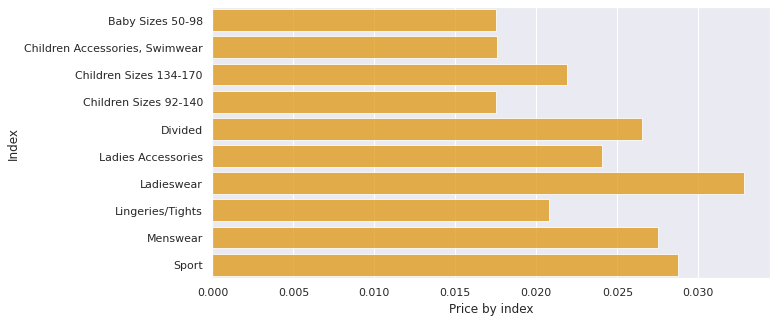

In [15]:
articles_index = trans_art[['index_name', 'price']].groupby('index_name').mean()
sns.set_style("darkgrid")
f, ax = plt.subplots(figsize=(10,5))
ax = sns.barplot(x=articles_index.price, y=articles_index.index, color='orange', alpha=0.8)
ax.set_xlabel('Price by index')
ax.set_ylabel('Index')
plt.show()

The index with the highest mean price is Ladieswear. With the lowest - children.

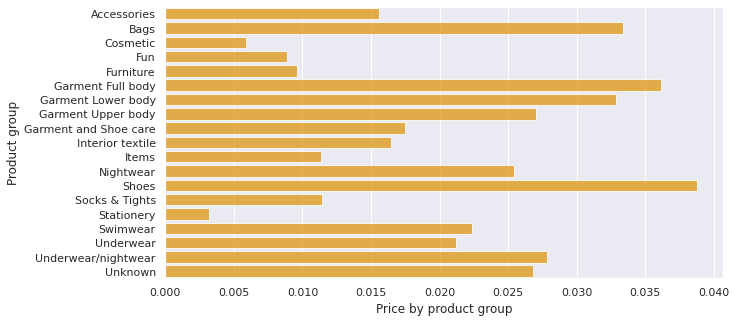

In [16]:
articles_index = trans_art[['product_group_name', 'price']].groupby('product_group_name').mean()
sns.set_style("darkgrid")
f, ax = plt.subplots(figsize=(10,5))
ax = sns.barplot(x=articles_index.price, y=articles_index.index, color='orange', alpha=0.8)
ax.set_xlabel('Price by product group')
ax.set_ylabel('Product group')
plt.show()

**Customers Dataset**

In [17]:
#importing the customer dataset
customers = pd.read_csv("../input/h-and-m-personalized-fashion-recommendations/customers.csv")
print('shape : ',customers.shape)
customers.head()

shape :  (1371980, 7)


,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,NaN,NaN,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,NaN,NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,NaN,NaN,ACTIVE,NONE,54.0,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,ACTIVE,Regularly,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...


In [18]:
#We can check if we haave any duplicate data for any customer
customers['customer_id'].shape[0]-customers['customer_id'].nunique()

0

In [19]:
#We may have many customers for a single postal code. lets analyze that
postal_cust=customers.groupby('postal_code').count().sort_values('customer_id',ascending=False)
postal_cust.head(10)

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age
postal_code,,,,,,
2c29ae653a9282cce4151bd87643c907644e09541abc28ae87dea0d1f6603b1c,120303,42874,39886,118281,114377,118002
cc4ed85e30f4977dae47662ddc468cd2eec11472de6fac5ec985080fd92243c8,261,109,104,261,261,260
714976379549eb90aae4a71bca6c7402cc646ae7c40f6c1cb91d4b5a18623fc1,159,90,88,159,159,158
7c1fa3b0ec1d37ce2c3f34f63bd792f3b4494f324b6be5d1e4ba6a75456b96a7,157,55,54,157,156,156
5b7eb31eabebd3277de632b82267286d847fd5d44287ee150bb4206b48439145,156,42,41,156,156,155
1f5bd429acc88fbbf24de844a59e438704aa8761bc7b99fd977cad297c50b74c,154,62,62,152,154,154
9d5787501bf1c77592156ba51eab13f4a2670c807686431a9e22a69090b02358,141,47,45,141,139,138
a1959a16bf167858c93a66ec2a330644512b25fb10f97eee2058549885af4dbd,138,42,41,138,138,138
087a46b65170845b4a55226ff1eb748ce7843d4b637cbe17f6bfbd1e645d2ffb,134,41,41,134,131,134


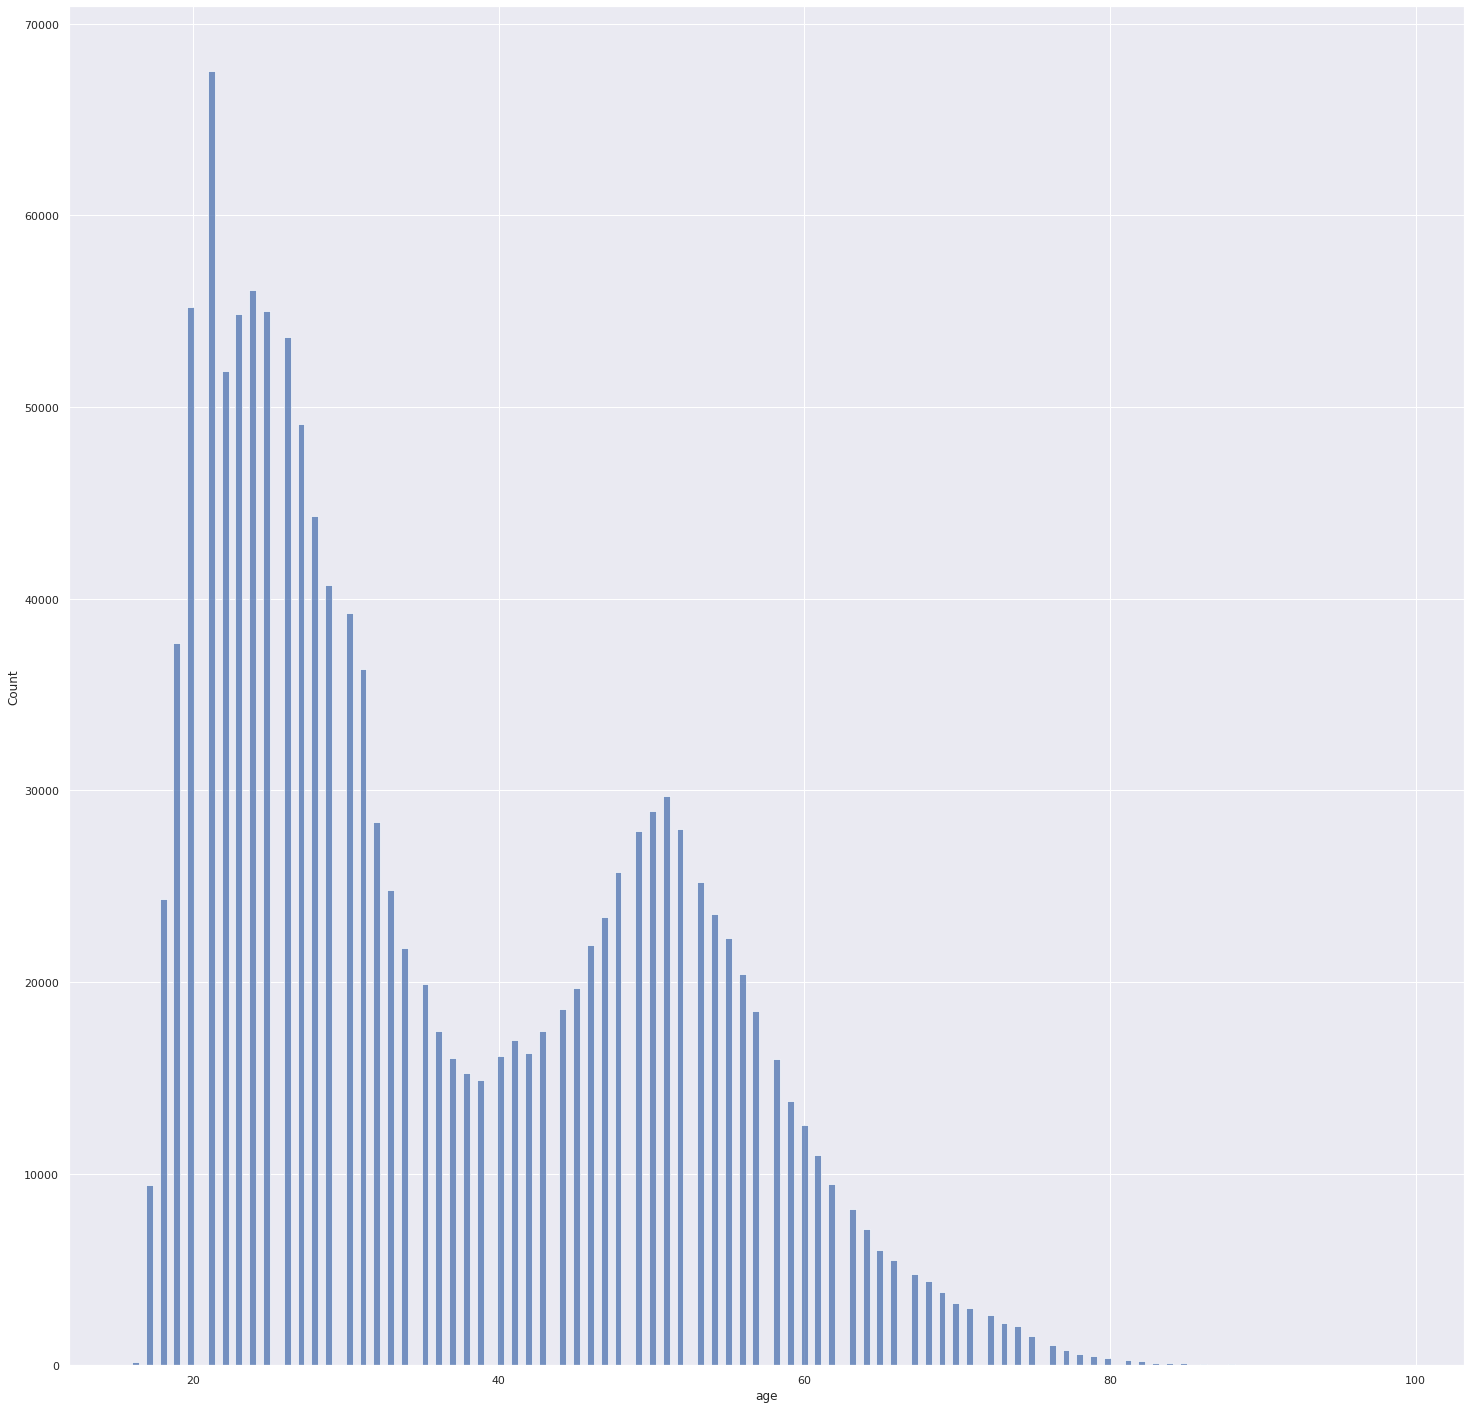

In [20]:
#With this customers table we also can get a clear idea of customer age group 
plt.subplots(figsize=(25,25))
ca=sns.histplot(data=customers,x='age')
plt.show()

From above graph we can clearly understand the most of our customers are from 18-28 and also 45-55.

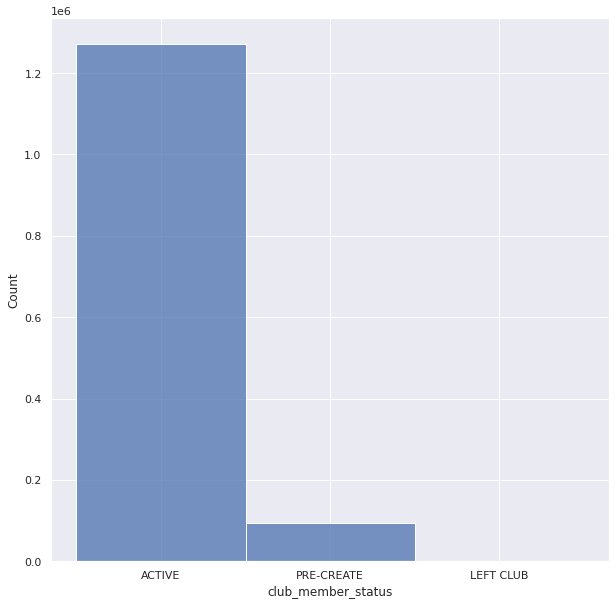

In [21]:
#We have one columns where we can get the number of sutomers with club member status. lets analyse the data
plt.subplots(figsize=(10,10))
ca=sns.histplot(data=customers,x='club_member_status')
plt.show()

From above we can clearly undersatnd that most of our customer has active cumber status

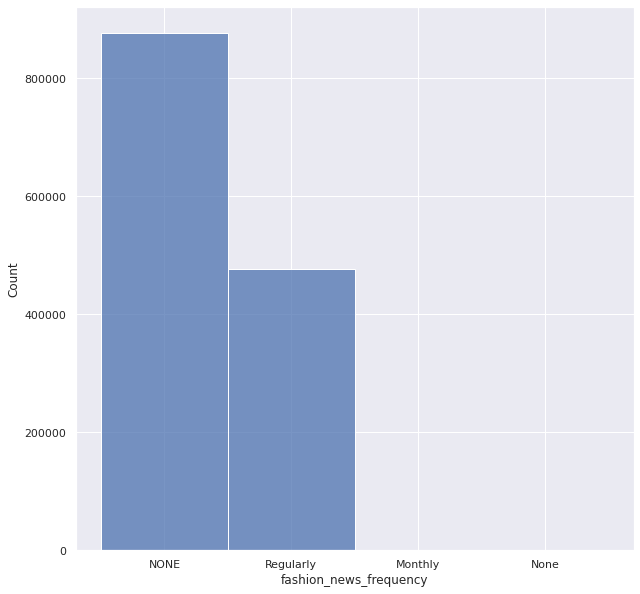

In [22]:
#Do our customer like the notification that we send?
plt.subplots(figsize=(10,10))
ca=sns.histplot(data=customers,x='fashion_news_frequency')
plt.show()

H&M need to check with the fashin notifiction team as most of our customer dont like the notificatios

**Images with description and price**

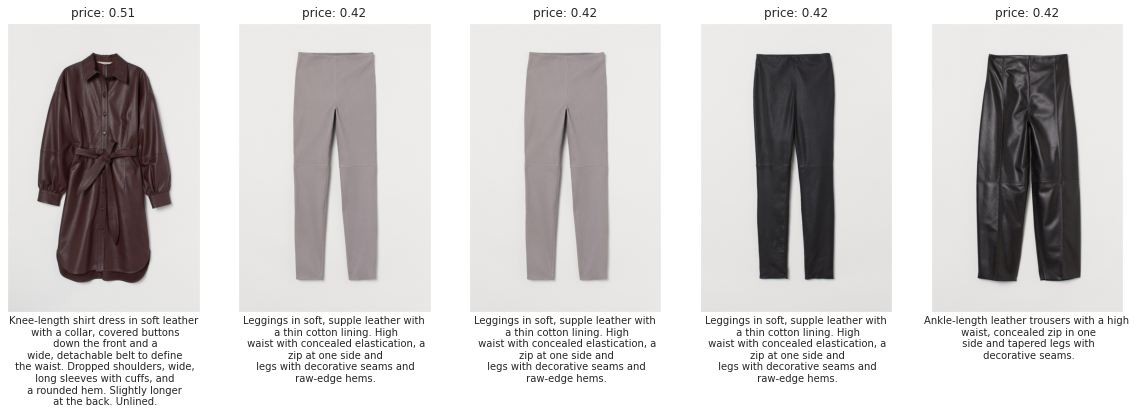

In [23]:
#Lets check our higher range clothes
max_price_ids = trans[trans.t_dat==trans.t_dat.max()].sort_values('price', ascending=False).iloc[:5][['article_id', 'price']]

f, ax = plt.subplots(1, 5, figsize=(20,10))
i = 0
for _, data in max_price_ids.iterrows():
    desc = articles[articles['article_id'] == data['article_id']]['detail_desc'].iloc[0]
    desc_list = desc.split(' ')
    for j, elem in enumerate(desc_list):
        if j > 0 and j % 5 == 0:
            desc_list[j] = desc_list[j] + '\n'
    desc = ' '.join(desc_list)
    img = mpimg.imread(f'../input/h-and-m-personalized-fashion-recommendations/images/0{str(data.article_id)[:2]}/0{int(data.article_id)}.jpg')
    ax[i].imshow(img)
    ax[i].set_title(f'price: {data.price:.2f}')
    ax[i].set_xticks([], [])
    ax[i].set_yticks([], [])
    ax[i].grid(False)
    ax[i].set_xlabel(desc, fontsize=10)
    i += 1
plt.show()

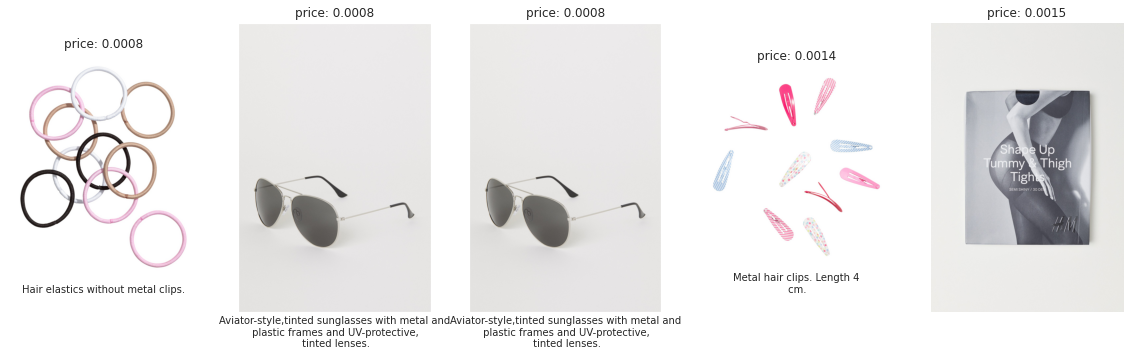

In [24]:
#ets check our lower range clothes
min_price_ids = trans[trans.t_dat==trans.t_dat.min()].sort_values('price', ascending=True).iloc[:5][['article_id', 'price']]

f, ax = plt.subplots(1, 5, figsize=(20,10))
i = 0
for _, data in min_price_ids.iterrows():
    desc = articles[articles['article_id'] == data['article_id']]['detail_desc'].iloc[0]
    desc_list = desc.split(' ')
    for j, elem in enumerate(desc_list):
        if j > 0 and j % 4 == 0:
            desc_list[j] = desc_list[j] + '\n'
    desc = ' '.join(desc_list)
    img = mpimg.imread(f'../input/h-and-m-personalized-fashion-recommendations/images/0{str(data.article_id)[:2]}/0{int(data.article_id)}.jpg')
    ax[i].imshow(img)
    ax[i].set_title(f'price: {data.price:.4f}')
    ax[i].set_xlabel(desc, fontsize=10)
    ax[i].set_xticks([], [])
    ax[i].set_yticks([], [])
    ax[i].grid(False)
    i += 1
plt.axis('off')
plt.show()

**Predictions**


In [25]:
#trans['t_dat'] = pd.to_datetime(trans['t_dat'])
#trans.set_index('t_dat', inplace=True)
#trans=pd.read_csv("../input/h-and-m-personalized-fashion-recommendations/transactions_train.csv")

In [26]:
listBin = [-1, 19, 29, 39, 49, 59, 69, 119]
customers['age_bins'] = pd.cut(customers['age'], listBin)
N = 12
listUniBins = customers['age_bins'].unique().tolist()
for uniBin in listUniBins:
    df  = trans[['t_dat', 'customer_id', 'article_id']]
    df['customer_id'].astype('string')
    if str(uniBin) == 'nan':
        customersTemp = customers[customers['age_bins'].isnull()]
    else:
        customersTemp = customers[customers['age_bins'] == uniBin]
    
    customersTemp = customersTemp.drop(['age_bins'], axis=1)
    #customersTemp = pd.from_pandas(customersTemp)
    
    df = df.merge(customersTemp[['customer_id', 'age']], on='customer_id', how='inner')
    print(f'The shape of scope transaction for {uniBin} is {df.shape}. \n')
    hex_to_int = lambda x: int(x, 16)
    #df[['A', 'B', 'C']] = df[['A', 'B', 'C']].applymap(hex_to_int)
    #df ['customer_id'] = df ['customer_id'].str[-16:].astype('int64')
    df ['customer_id'] = df ['customer_id'].apply(lambda x: int(x, base=16))
    df['t_dat'] = pd.to_datetime(df['t_dat'])
   
    last_ts = df['t_dat'].max()

    tmp = df[['t_dat']]
    tmp['dow'] = tmp['t_dat'].dt.dayofweek
    tmp['ldbw'] = tmp['t_dat'] - pd.TimedeltaIndex(tmp['dow'] - 1, unit='D')
    tmp.loc[tmp['dow'] >=2 , 'ldbw'] = tmp.loc[tmp['dow'] >=2 , 'ldbw'] + pd.TimedeltaIndex(np.ones(len(tmp.loc[tmp['dow'] >=2])) * 7, unit='D')

    df['ldbw'] = tmp['ldbw'].values
    
    weekly_sales = df.drop('customer_id', axis=1).groupby(['ldbw', 'article_id']).count().reset_index()
    weekly_sales = weekly_sales.rename(columns={'t_dat': 'count'})
    
    df = df.merge(weekly_sales, on=['ldbw', 'article_id'], how = 'left')
    
    weekly_sales = weekly_sales.reset_index().set_index('article_id')

    df = df.merge(
        weekly_sales.loc[weekly_sales['ldbw']==last_ts, ['count']],
        on='article_id', suffixes=("", "_targ"))

    df['count_targ'].fillna(0, inplace=True)
    del weekly_sales
    
    df['quotient'] = df['count_targ'] / df['count']
    
    target_sales = df.drop('customer_id', axis=1).groupby('article_id')['quotient'].sum()
    general_pred = target_sales.nlargest(N).index.tolist()
    general_pred = ['0' + str(article_id) for article_id in general_pred]
    general_pred_str =  ' '.join(general_pred)
    del target_sales
    
    purchase_dict = {}

    tmp = df
    tmp['x'] = ((last_ts - tmp['t_dat']) / np.timedelta64(1, 'D')).astype(int)
    tmp['dummy_1'] = 1 
    tmp['x'] = tmp[["x", "dummy_1"]].max(axis=1)

    a, b, c, d = 2.5e4, 1.5e5, 2e-1, 1e3
    tmp['y'] = a / np.sqrt(tmp['x']) + b * np.exp(-c*tmp['x']) - d

    tmp['dummy_0'] = 0 
    tmp['y'] = tmp[["y", "dummy_0"]].max(axis=1)
    tmp['value'] = tmp['quotient'] * tmp['y'] 

    tmp = tmp.groupby(['customer_id', 'article_id']).agg({'value': 'sum'})
    tmp = tmp.reset_index()

    tmp = tmp.loc[tmp['value'] > 0]
    tmp['rank'] = tmp.groupby("customer_id")["value"].rank("dense", ascending=False)
    tmp = tmp.loc[tmp['rank'] <= 12]

    purchase_df = tmp.sort_values(['customer_id', 'value'], ascending = False).reset_index(drop = True)
    purchase_df['prediction'] = '0' + purchase_df['article_id'].astype(str) + ' '
    purchase_df = purchase_df.groupby('customer_id').agg({'prediction': sum}).reset_index()
    purchase_df['prediction'] = purchase_df['prediction'].str.strip()
    purchase_df = pd.DataFrame(purchase_df)
    
    sub  = pd.read_csv('../input/h-and-m-personalized-fashion-recommendations/sample_submission.csv',
                            usecols= ['customer_id'], 
                            dtype={'customer_id': 'string'})
    
    numCustomers = sub.shape[0]
    
    sub = sub.merge(customersTemp[['customer_id', 'age']], on='customer_id', how='inner')

    #sub['customer_id2'] = sub['customer_id'].str[-16:].str.hex_to_int().astype('int64')
    sub['customer_id2'] = sub['customer_id']
    sub = sub.merge(purchase_df, left_on = 'customer_id2', right_on = 'customer_id', how = 'left',
                   suffixes = ('', '_ignored'))

    #sub = sub.to_pandas()
    sub['prediction'] = sub['prediction'].fillna(general_pred_str)
    sub['prediction'] = sub['prediction'] + ' ' +  general_pred_str
    sub['prediction'] = sub['prediction'].str.strip()
    sub['prediction'] = sub['prediction'].str[:131]
    sub = sub[['customer_id', 'prediction']]
    sub.to_csv(f'submission_' + str(uniBin) + '.csv',index=False)
    print(f'Saved prediction for {uniBin}. The shape is {sub.shape}. \n')
    print('-'*50)
print('Finished.\n')
print('='*50)

The shape of scope transaction for (39.0, 49.0] is (4908363, 4). 

Saved prediction for (39.0, 49.0]. The shape is (204118, 2). 

--------------------------------------------------
The shape of scope transaction for (19.0, 29.0] is (13058587, 4). 

Saved prediction for (19.0, 29.0]. The shape is (528358, 2). 

--------------------------------------------------
The shape of scope transaction for (49.0, 59.0] is (5136958, 4). 

Saved prediction for (49.0, 59.0]. The shape is (226242, 2). 

--------------------------------------------------
The shape of scope transaction for nan is (140258, 4). 

Saved prediction for nan. The shape is (15861, 2). 

--------------------------------------------------
The shape of scope transaction for (29.0, 39.0] is (6428863, 4). 

Saved prediction for (29.0, 39.0]. The shape is (234068, 2). 

--------------------------------------------------
The shape of scope transaction for (69.0, 119.0] is (220067, 4). 

Saved prediction for (69.0, 119.0]. The shape i

In [27]:
for i, uniBin in enumerate(listUniBins):
    dfTemp  = pd.read_csv(f'submission_' + str(uniBin) + '.csv')
    if i == 0:
        dfSub = dfTemp
    else:
        dfSub = pd.concat([dfSub, dfTemp], axis=0)

assert dfSub.shape[0] == numCustomers, f'The number of dfSub rows is not correct. {dfSub.shape[0]} vs {numCustomers}.'

dfSub.to_csv(f'submission.csv', index=False)
print(f'Saved submission.csv.')

Saved submission.csv.


In [28]:
dfCheck = pd.read_csv('./submission.csv')
dfCheck.head(5)

,customer_id,prediction
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,0751471001 0448509014 0579541001 0706016001 06...
1,00009c2aeae8761f738e4f937d9be6b49861a66339c2b1...,0751471001 0448509014 0579541001 0706016001 06...
2,0000b95f630aaa9313028ce9c41154bb95ac7afa34f55b...,0751471001 0448509014 0579541001 0706016001 06...
3,0000c97821eb48d0e590fd309133f0a6c08f7750f64ccc...,0751471001 0448509014 0579541001 0706016001 06...
4,0000d6c053fc8f9389d4565051f12402d5774aa4a9d2e5...,0751471001 0448509014 0579541001 0706016001 06...


# **Thank you for watching my analysis.**